# **SentimentArcs (Part 5): Transformer Models**

```
Jon Chun
12 Jun 2021: Started
12 Apr 2022: Last Update
```

TODO: 
* check for recovery from multiple runs/overwrites
* pull save repetitive 3code blocks checkpoint code into single def
* Force_Recompute = True

In [ ]:
# Make sure using a GPU

# Tesla V100 = (3.0 x) P100 (2 vCPUs)
#       P100 = (1.6 x) K80  (2 vCPUs/12GB RAM)
#       P100 ~ T4 
#       K80  = (     ) NVIDA GeForce RTX 3080 Ti
#
# High RAM Colab Pro  32GB RAM     $9.99/mo
#          Colab Pro+ 52GB        $49.95/mo

# Paperspace Free & Paid JupyterLab vs Google Colab
# https://blog.paperspace.com/alternative-to-google-colab-pro/#:~:text=Most%20notable%20is%20that%20the,and%2012%20GB%20of%20RAM.&text=Meanwhile%2C%20in%20Paperspace%20Gradient%2C%20GPU,a%20Free%20or%20Paid%20instance. 
# https://www.kaggle.com/general/198232
# https://towardsdatascience.com/deep-learning-on-a-budget-450-egpu-vs-google-colab-494f9a2ff0db (3080 vs Colab)
# https://towardsdatascience.com/when-to-use-cpus-vs-gpus-vs-tpus-in-a-kaggle-competition-9af708a8c3eb (Kaggle Comp)
# https://towardsdatascience.com/google-colab-pro-is-it-worth-49-99-c542770b8e56 (Colab Pro+)
# https://www.quora.com/Which-is-better-Google-Colab-or-Kaggle-Notebook (Kaggle vs Colab GPUs)

!nvidia-smi

# **[RESTART RUNTIME] May be Required for these Libaries**

# **[STEP 1] Manual Configuration/Setup**



In [ ]:
!pip install transformers[sentencepiece]

     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 4.0 MB 5.0 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 596 kB 66.2 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 77 kB 8.6 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 6.6 MB 48.9 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 895 kB 63.2 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 1.2 MB 27.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## (Popups) Connect Google gDrive

In [ ]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive')
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

## (3 Inputs) Define Directory Tree

In [ ]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.

# #@markdown **Instructions**

# #@markdown Set Directory and Corpus names:
# #@markdown <li> Set <b>Path_to_SentimentArcs</b> to the project root in your **GDrive folder**
# #@markdown <li> Set <b>Corpus_Genre</b> = [novels, finance, social_media]
# #@markdown <li> <b>Corpus_Type</b> = [reference_corpus, new_corpus]
# #@markdown <li> <b>Corpus_Number</b> = [1-20] (id nunmber if a new_corpus)

#@markdown <hr>

# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/sentimentarcs_notebooks/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}


#@markdown Set this to the project root in your <b>GDrive folder</b>
#@markdown <br> (e.g. /<wbr><b>gdrive/MyDrive/research/sentiment_arcs/</b>)

#@markdown <hr>

#@markdown **Which type of texts are you cleaning?** \

Corpus_Genre = "novels" #@param ["novels", "social_media", "finance"]

# Corpus_Type = "reference" #@param ["new", "reference"]
Corpus_Type = "new" #@param ["new", "reference"]


Corpus_Number = 3 #@param {type:"slider", min:1, max:10, step:1}


#@markdown Put in the corresponding Subdirectory under **./text_raw**:
#@markdown <li> All Texts as clean <b>plaintext *.txt</b> files 
#@markdown <li> A <b>YAML Configuration File</b> describing each Texts

#@markdown Please verify the required textfiles and YAML file exist in the correct subdirectories before continuing.

print('Current Working Directory:')
%cd $Path_to_SentimentArcs

print('\n')

if Corpus_Type == 'reference':
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_reference'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_reference'
else:
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'

# PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_TEXT_RAW}'
# PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'
PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'

# TODO: Clean up
# SUBDIR_TEXT_CLEAN = PATH_TEXT_CLEAN

print(f'PATH_SENTIMENT_RAW:\n  [{PATH_SENTIMENT_RAW}]')
print(f'SUBDIR_SENTIMENT_RAW:\n  [{SUBDIR_SENTIMENT_RAW}]')

print('\n')

print(f'PATH_TEXT_CLEAN:\n  [{PATH_TEXT_CLEAN}]')
print(f'SUBDIR_TEXT_CLEAN:\n  [{SUBDIR_TEXT_CLEAN}]')

# **[STEP 2] Automatic Configuration/Setup**

## (each time) Custom Libraries & Define Globals

In [ ]:
# Add PATH for ./utils subdirectory

import sys
import os

!python --version

print('\n')

PATH_UTILS = f'{Path_to_SentimentArcs}utils'
PATH_UTILS

sys.path.append(PATH_UTILS)

print('Contents of Subdirectory [./sentiment_arcs/utils/]\n')
!ls $PATH_UTILS

# More Specific than PATH for searching libraries
# !echo $PYTHONPATH

In [ ]:
# Review Global Variables and set the first few

import global_vars as global_vars

global_vars.SUBDIR_SENTIMENTARCS = Path_to_SentimentArcs
global_vars.Corpus_Genre = Corpus_Genre
global_vars.Corpus_Type = Corpus_Type
global_vars.Corpus_Number = Corpus_Number

global_vars.SUBDIR_SENTIMENT_RAW = SUBDIR_SENTIMENT_RAW
global_vars.PATH_SENTIMENT_RAW = PATH_SENTIMENT_RAW

global_vars.SUBDIR_TEXT_CLEAN = SUBDIR_TEXT_CLEAN
global_vars.PATH_TEXT_CLEAN = PATH_TEXT_CLEAN

from utils import sa_config # (e.g. define TEST_WORDS_LS)

sa_config.set_globals()

global_vars.TEST_WORDS_LS
print('\n')

dir(global_vars)

In [ ]:
# Initialize and clean for each iteration of notebook

# dir(global_vars)

global_vars.corpus_texts_dt = {}
global_vars.corpus_titles_dt = {}

In [ ]:
# Import SentimentArcs Utilities to define Directory Structure
#   based the Selected Corpus Genre, Type and Number

!pwd 
print('\n')

# from utils import sa_config # .sentiment_arcs_utils
from utils import sa_config

print('Objects in sa_config()')
print(dir(sa_config))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
sa_config.get_subdirs(Path_to_SentimentArcs, Corpus_Genre, Corpus_Type, Corpus_Number, 'none')


In [ ]:
%whos 

## (each time) Read YAML Configuration for Corpus and Models 

In [ ]:
# from utils import sa_config # .sentiment_arcs_utils

import yaml

from utils import read_yaml

print('Objects in read_yaml()')
print(dir(read_yaml))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
read_yaml.read_corpus_yaml(Corpus_Genre, Corpus_Type, Corpus_Number)

print('SentimentArcs Model Ensemble ------------------------------\n')
model_titles_ls = global_vars.models_titles_dt.keys()
print('\n'.join(model_titles_ls))


print('\n\nCorpus Texts ------------------------------\n')
corpus_titles_ls = list(global_vars.corpus_titles_dt.keys())
print('\n'.join(corpus_titles_ls))


print(f'\n\nThere are {len(model_titles_ls)} Models in the SentimentArcs Ensemble above.\n')
print(f'\nThere are {len(corpus_titles_ls)} Texts in the Corpus above.\n')
print('\n')

global_vars.corpus_titles_dt

In [ ]:
global_vars.models_titles_dt.items()

In [ ]:
global_vars.corpus_titles_dt

## Configure Jupyter Notebook

In [ ]:
# Configure Jupyter

# To reload modules under development

# Option (a)
%load_ext autoreload
%autoreload 2
# Option (b)
# import importlib
# importlib.reload(functions.readfunctions)


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Install Python Libraries

In [ ]:
# Intentionally left blank

## Load Libraries

In [ ]:
import numpy as np

from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('max_colwidth', 100) # -1)

from glob import glob
import copy
import json

In [ ]:
# Scikit Utilities, Metrics, Pipelines and Models

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [ ]:
"""

# Define Globals

# Main data structure: Dictionary (key=text_name) of DataFrames (cols: text_raw, text_clean)
corpus_texts_dt = {}

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/get_globals.py'

SLANG_DT.keys()
""";

## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [ ]:
# Configure Matplotlib

# View available styles
# plt.style.available

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_matplotlib.py'

config_matplotlib()

print('Matplotlib Configuration ------------------------------')
print('\n  (Uncomment to view)')
# plt.rcParams.keys()
print('\n  Edit ./utils/config_matplotlib.py to change')

## Setup Seaborn Style

In [ ]:
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')


## Python Utility Functions

### (each time) Generate Convenient Data Lists

In [ ]:
# Derive List of Texts in Corpus a)keys and b)full author and titles

print('Dictionary: corpus_titles_dt')
global_vars.corpus_titles_dt
print('\n')

corpus_texts_ls = list(global_vars.corpus_titles_dt.keys())
print(f'\nCorpus Texts:')
for akey in corpus_texts_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNatural Corpus Titles:')
corpus_titles_ls = [x[0] for x in list(global_vars.corpus_titles_dt.values())]
for akey in corpus_titles_ls:
  print(f'  {akey}')


In [ ]:
# Get Model Families of Ensemble

from utils.get_model_families import get_ensemble_model_famalies

global_vars.model_ensemble_dt = get_ensemble_model_famalies(global_vars.models_titles_dt)

print('\nTest: Lexicon Family of Models:')
global_vars.model_ensemble_dt['lexicon']

### File Functions

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/file_utils.py'
# from utils.file_utils import *

# %run -i './utils/file_utils.py'

# TODO: Not used? Delete?
# get_fullpath(text_title_str, ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False)

# **[STEP 3] Read all Preprocessed Novels**

## Read Cleaned Text

In [ ]:
# Verify cwd and subdir of Cleaned Corpus Texts

print('Current Working Directory:')
!pwd

print(f'\nSubdir with all Cleaned Texts of Corpus:\n  {SUBDIR_TEXT_CLEAN}')

print(f'\n\nFilenames of Cleaned Texts:\n')
!ls -1 {Path_to_SentimentArcs}{PATH_TEXT_CLEAN}

print('\n')

print(corpus_texts_ls)

In [ ]:
"""

# Create a List (preprocessed_ls) of all preprocessed text files

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

try:
    preprocessed_ls = glob(f'{PATH_TEXT_CLEAN}/*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
except IndexError:
    raise RuntimeError('No csv file found')

print('\n'.join(preprocessed_ls))
print('\n')
print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')

"""

In [ ]:
# Read all preprocessed text files into master DataFrame (corpus_dt)

global_vars.corpus_texts_dt = {}

for i,atext in enumerate(corpus_texts_ls):
  print(f'Processing #{i}: {atext}...')
  afile_fullpath = f'{PATH_TEXT_CLEAN}/{atext}.csv'
  print(f'               {afile_fullpath}')
  atext_df = pd.read_csv(afile_fullpath, index_col=[0])
  global_vars.corpus_texts_dt[atext] = atext_df

In [ ]:
# Verify the Text read into master Dictionary of DataFrames

global_vars.corpus_texts_dt.keys()
print('\n')
print(f'There were {len(global_vars.corpus_texts_dt)} preprocessed Text read into the Dict global_vars.corpus_texts_dt')

In [ ]:
# Check if there are any Null strings in the text_clean columns

for i, atext in enumerate(list(global_vars.corpus_texts_dt.keys())):
  print(f'\nNovel #{i}: {atext}')
  nan_ct = global_vars.corpus_texts_dt[atext].text_clean.isna().sum()
  if nan_ct > 0:
    print(f'      {nan_ct} Null strings in the text_clean column')

In [ ]:
# Fill in all the Null value of text_clean with placeholder 'empty_string'

for i, atext in enumerate(list(global_vars.corpus_texts_dt.keys())):
  # print(f'Novel #{i}: {atext}')
  # Fill all text_clean == Null with 'empty_string' so sentimentr::sentiment doesn't break
  global_vars.corpus_texts_dt[atext].iloc[global_vars.corpus_texts_dt[atext].text_clean.isna()] = 'empty_string'

In [ ]:
# Verify DataFrame of first Text in Corpus Dictionary

global_vars.corpus_texts_dt[next(iter(global_vars.corpus_texts_dt))].head()

In [ ]:
# [SKIP]

In [ ]:
"""

print(f'Trying to find EXISTING Raw Sentiment Datafile:\n  [{FNAME_SENTIMENT_RAW}]\n  in Raw Sentiment Subdir: {SUBDIR_SENTIMENT_RAW}\n')

corpus_texts_dt = {}
subdir_sentiment_raw_ls = os.listdir(SUBDIR_SENTIMENT_RAW)

# Verify in SentimentArcs Root Directory and cd into ./utils for R programs
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

if FNAME_SENTIMENT_RAW not in subdir_sentiment_raw_ls:
  # No Existing Raw Sentiment Data, Just read in Clean Text
  print(f'No EXISTING Raw Sentiment Datafile exists, Start from Stratch...\n')

  # Create a List (texts_clean_ls) of all preprocessed text files
  try:
    texts_clean_ls = glob(f'{SUBDIR_TEXT_CLEAN}*.csv')
    texts_clean_ls = [x.split('/')[-1] for x in texts_clean_ls]
    texts_clean_ls = [x.split('.')[0] for x in texts_clean_ls]
  except IndexError:
    raise RuntimeError('No csv file found')

  # Read all preprocessed text files into master DataFrame (corpus_dt)
  for i,anovel in enumerate(texts_clean_ls):
    print(f'Processing #{i}: {anovel}...')
    afile_fullpath = f'{SUBDIR_TEXT_CLEAN}{anovel}.csv'
    print(f'               {afile_fullpath}')
    anovel_df = pd.read_csv(afile_fullpath, index_col=[0])
    corpus_texts_dt[anovel] = anovel_df

  print('\n'.join(texts_clean_ls))
  print('\n')
  print(f'Found {len(texts_clean_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')
else:
  # Found Existing Raw Sentiment Data with Clean Text, Read Both
  print(f'Found EXISTING  Raw Sentiment Datafile exists, Loading...\n')
  corpus_texts_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
  print(f'The  Models have Analyzed these Texts in the Corpus:\n\n  {corpus_texts_dt.keys()}\n\n')    

# Verify Corpus DataFrame
corpus_titles_ls = list(corpus_texts_dt.keys())
# corpus_texts_dt[corpus_titles_ls[0]].head()
corpus_texts_dt[corpus_titles_ls[0]].info()

""";

In [ ]:
models_ls = list(set(global_vars.corpus_texts_dt[corpus_texts_ls[0]].columns) - set(['text_clean','text_raw']))
print(f'There are [{len(models_ls)} Models] Pre-Existing in the Datafile for this Notebook:\n')
models_ls
print('\n')

print(f'There are [{len(corpus_texts_ls)} Texts] in the current Corpus:\n')
corpus_titles_ls

## (del?) If Sentiment Time Series exist, Verify with Plots

In [ ]:
# from sklearn.preprocessing import StandardScaler, RobustScaler

# r_scaler = RobustScaler() 
# z_scaler = StandardScaler()


# **[STEP 4] Transformer Models**

## Common Transformer Setup

In [ ]:
from transformers import pipeline

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification

from transformers import AutoTokenizer, AutoModelWithLMHead  # T5Base 50k

In [ ]:
# Define all Corpus Texts & Ensemble Models as global CONSTANTS

model_family = 'transformer'

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)
%run -i './utils/get_sentiments.py'

#@markdown If Model Values already exist, Recompute anyway and Overwrite?

Force_Recompute = False #@param {type:"boolean"}

# Get list Names for This Section of Python Lexicon Models

# models_lexicon_ls = ensemble_models_dt['lexicon']
models_pylex_ls = [x for x in global_vars.model_ensemble_dt[model_family]]
print(f'Lexicon Models in this Section:\n')
print(models_pylex_ls)

In [ ]:
global_vars.corpus_texts_dt.keys()

In [ ]:
"""

# from utils import sa_config (e.g. define TEST_WORDS_LS)

from utils import sa_config

sa_config.set_globals()
""";

global_vars.TEST_WORDS_LS



In [ ]:
global_vars.models_titles_dt

In [ ]:
global_vars.model_ensemble_dt.keys()

## **RoBERTa Large 15 Datasets (5 cats)**

In [ ]:
%%time

# NOTE: 00m11s @12:39 on 20220301 Colab Pro 

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

print(sa_model("I love this!"))

In [ ]:
# Define Model and Test

model_title = 'RoBERTa Large 15DB'
model_name = 'roberta15lg'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sa_model(asent_str)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl}\n')

In [ ]:
%%time

# NOTE:   ~40m00s @12:39 on 20220301 Colab Pro P100 (1 Novels)
#       ~1h31m00s @12:39 on 20220301 Colab Pro P100 (2 Novels: 535k, 536k)
#        3h08m00s @03:12 on 20220412 Colab Pro P100 (3 Novels, 628k, 662k, 897k)
#         ~00m00s @19:31 on 20220411 Colab Pro T4 (2 Novels: 535k, 536k)
#          37m27s @14:40 on 20220419 Colab Pro T4 (1 Novel: 502k)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: labelscore2fl(classifier(x), sa_model=classifier))
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: labelscore2fl(sa_model(x), sa_model=model_name))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

Processing #0: pkdick_doandroidsdreamofelectricsheep


  0%|          | 0/5820 [00:00<?, ?it/s]

  [roberta15lg] Sentiment Recomputed and Value Updated
CPU times: user 27min 53s, sys: 6.49 s, total: 27min 59s
Wall time: 28min 17s


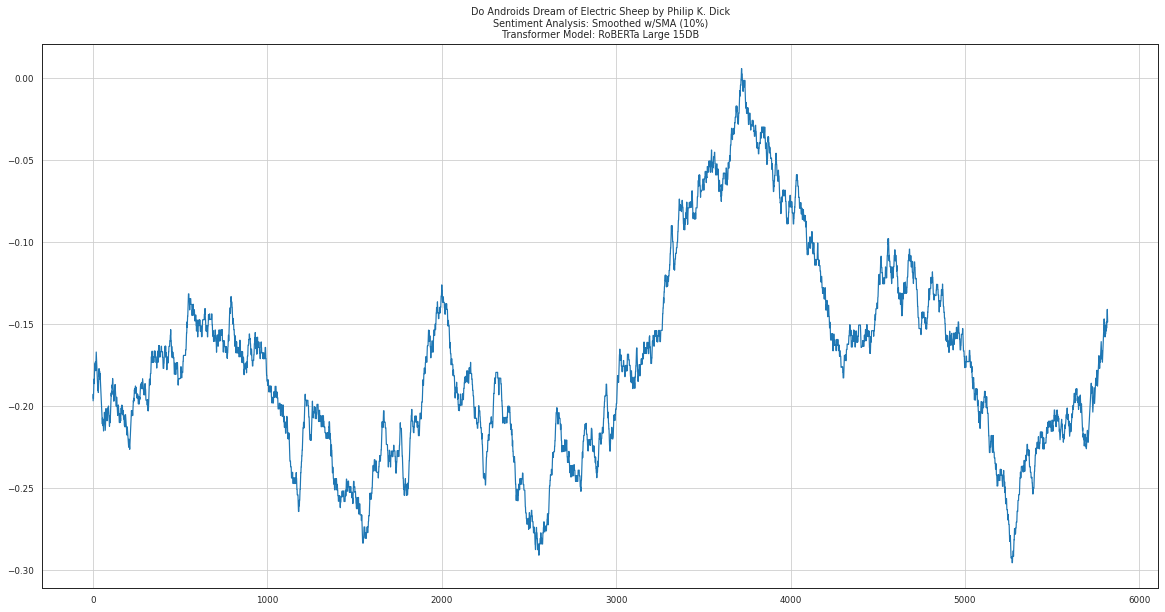

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0                                                                 DO ANDROIDS DREAM OF ELECTRIC SHEEP?   
1  A merry little surge of electricity piped by automatic alarm from the mood organ beside his bed ...   
2  Surprised - it always surprised him to find himself awake without prior notice - he rose from th...   
3  Now, in her bed, his wife Iran opened her gray, unmerry eyes, blinked, then groaned and shut her...   
4                                                      "You set your Penfield too weak he said to her.   

                                                                                            text_clean  \
0                                                                   do android dream of electric sheep   
1  a merry little surge of electricity pipe by automatic alarm from the mood organ beside his bed a...   
2  surprise it always surprise him to find himself awake without prior notice he rise from the bed ...   
3       now in her bed his wife iran open her gray unmerry eye blink then groan and shut her eye again   
4                                                         you set your penfield too weak he say to her   

   roberta15lg  
0    -0.988568  
1     0.998337  
2     0.998160  
3    -0.998644  
4    -0.999457

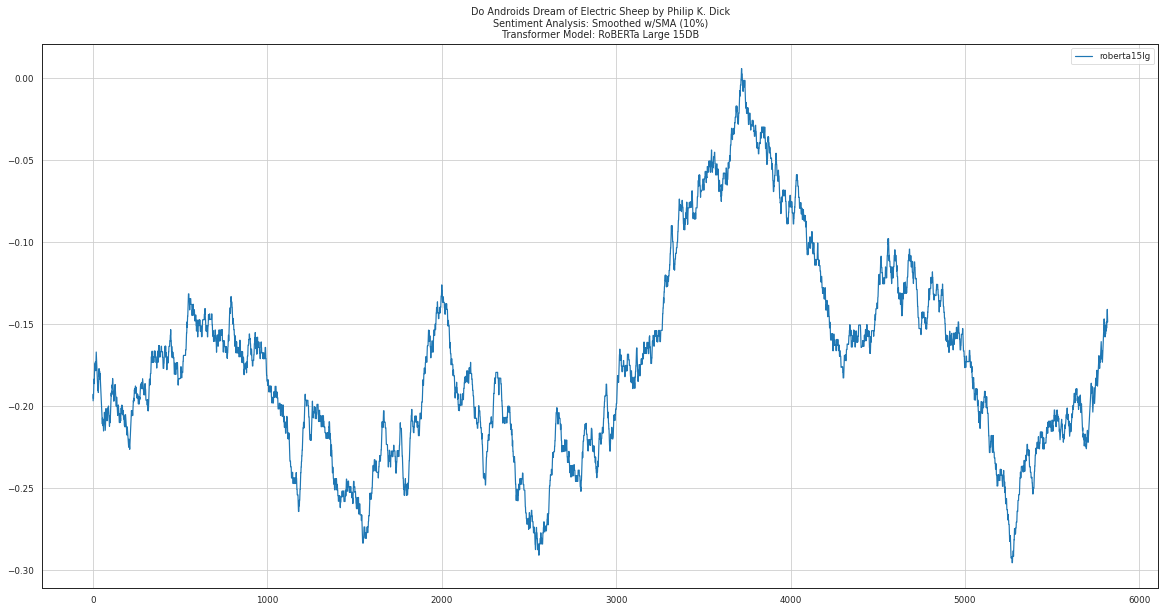

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'roberta15lg'
# model_current = 'roberta15lg'

os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['pkdick_doandroidsdreamofelectricsheep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus5/'

Saving roberta15lg Model for all Texts
Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus5//sentiment_raw_novels_new_corpus5_transformer_roberta15lg.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 5590
-rw------- 1 root root 1911427 Apr 20 03:07 sentiment_raw_novels_new_corpus5_all_4syuzhetr.json
-rw------- 1 root root 3418637 Apr 20 03:19 sentiment_raw_novels_new_corpus5_all_8sentimentr.json
-rw------- 1 root root  392712 Apr 20 04:04 sentiment_raw_novels_new_corpus5_transformer_roberta15lg.json


## **Huggingface Distill BERT SST**

In [ ]:
# BUG: Cannot reuse variable name 'sa_model', causes replicated results of first model declared (e.g. roberta15lg)
# sa_model = pipeline("sentiment-analysis")

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis")

In [ ]:
# Define Model and Test

model_title = 'Huggingface DistilBERT'
model_name = 'huggingface'
model_type = 'Transformer'

# Test Emoji
sa_model("We are very happy to show you the ðŸ¤— Transformers library.")
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sa_model(asent_str)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl}\n')

In [ ]:
list(global_vars.corpus_texts_dt.keys())

In [ ]:
%%time

# NOTE: 

# NOTE:   10m25s @02:48 on 20220304 Colab Pro T4 (2 Novels: 535k, 536k)
#         24m26s @08:58 on 20220412 Colab Pro P100 (3 Novels: 1.2M, 1.3M, 1.7M)
#         24m17s @11:20 on 20220412 Colab Pro P100 (3 Novels: 1.2M, 1.3M, 1.7M)
#          8m49s @13:52 on 20220412 Colab Pro T4 (2 Texts: 1M, 1.1M)
#          3m05s @22:10 on 20220415 Colab Pro K80 (3 Novels, 628k, 662k, 897k)
#        ~15m05s @13:45 on 20220418 Colab Pro P100 (2 FinTexts, 3.4M 936k)
#          6m26s @15:33 on 20220419 Colab Pro T4 (1 Novel: 502k)

# for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
for indx_obj in enumerate(global_vars.corpus_texts_dt.keys()):
  i, atext = indx_obj
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: labelscore2fl(sa_model(x), sa_model='huggingface'))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
# print(f'win_per: {win_per}')
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
# print(f'text_title_str: {text_title_str}')
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0                                                                 DO ANDROIDS DREAM OF ELECTRIC SHEEP?   
1  A merry little surge of electricity piped by automatic alarm from the mood organ beside his bed ...   
2  Surprised - it always surprised him to find himself awake without prior notice - he rose from th...   
3  Now, in her bed, his wife Iran opened her gray, unmerry eyes, blinked, then groaned and shut her...   
4                                                      "You set your Penfield too weak he said to her.   

                                                                                            text_clean  \
0                                                                   do android dream of electric sheep   
1  a merry little surge of electricity pipe by automatic alarm from the mood organ beside his bed a...   
2  surprise it always surprise him to find himself awake without prior notice he rise from the bed ...   
3       now in her bed his wife iran open her gray unmerry eye blink then groan and shut her eye again   
4                                                         you set your penfield too weak he say to her   

   roberta15lg  huggingface  
0    -0.988568     0.888154  
1     0.998337     0.964321  
2     0.998160     0.659327  
3    -0.998644    -0.976472  
4    -0.999457    -0.999153

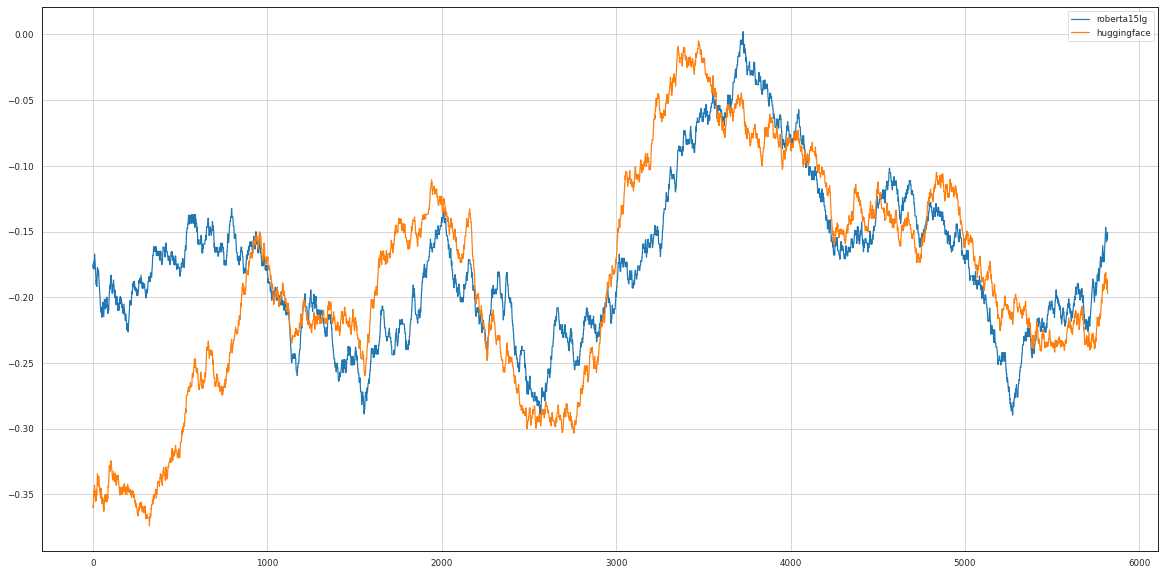

In [ ]:
# Plot all models

models_all_ls = list(global_vars.corpus_texts_dt[corpus_texts_ls[0]].select_dtypes(include=[np.float]).columns)

global_vars.corpus_texts_dt[corpus_texts_ls[0]][models_all_ls].rolling(600, center=True, min_periods=0).mean().plot()
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'huggingface'
# model_current = 'huggingface'

os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **NLPTown Multilingual BERT (5 cats)**

In [ ]:
# NLPTown: Multilingual trained BERT Model

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis",model="nlptown/bert-base-multilingual-uncased-sentiment")

# Test
# print(sa_nlptown("I love this!"))
print(sa_model("I love this!"))

In [ ]:
# Define Model and Test

model_title = 'NLPTown MultiBERT'
model_name = 'nlptown'
model_type = 'Transformer'

# Test Emoji
sa_model("We are very happy to show you the ðŸ¤— Transformers library.")
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sa_model(asent_str)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl}\n')

In [ ]:
%%time

# NOTE:   9m05s @16:40 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity)
#        ~8m07s @16:49 on 20220201 Colab Pro P100 (1 Novel: scollins_thehungergames1)
#        25m14s @08:58 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)
#        25m14s @11:53 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)
#       ~18m30s @14:23 on 20220412 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#        12m39s @15:40 on 20220419 Colab Pro T4 (1 Novel: 502k)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: labelscore2fl(sa_model(x), sa_model='nlptown'))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'nlptown'
# model_current = 'nlptown'

os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **Yelp Finetuned BERT (5 cats)**

In [ ]:
# Yelp Trained BERT Sentiment Classifier

tokenizer = AutoTokenizer.from_pretrained("gilf/english-yelp-sentiment")

sa_model = None
del sa_model
sa_model = AutoModelForSequenceClassification.from_pretrained("gilf/english-yelp-sentiment")

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)
print(f'Yelp SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'\n\nSENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')

In [ ]:
# Define Model and Test

model_title = 'Yelp BERT'
model_name = 'yelp'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
aemoji_str_enc = tokenizer(emoji_str, return_tensors='pt')
logits_tensor = sa_model(**aemoji_str_enc)
sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
print(f'Emoji String: {emoji_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  aword_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


In [ ]:
%%time

# NOTE:    10m45s @17:39 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#          10m19s @17:48 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)
#          49m55s @12:45 on 20220412 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#          49m55s @14:54 on 20220412 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#          30m27s @23:32 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)
#          13m33s @15:54 on 20220419 Colab Pro T4 (1 Novel: 502k)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: logitstensor2sentiment(sa_model(**tokenizer(x, return_tensors='pt')))[0])
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


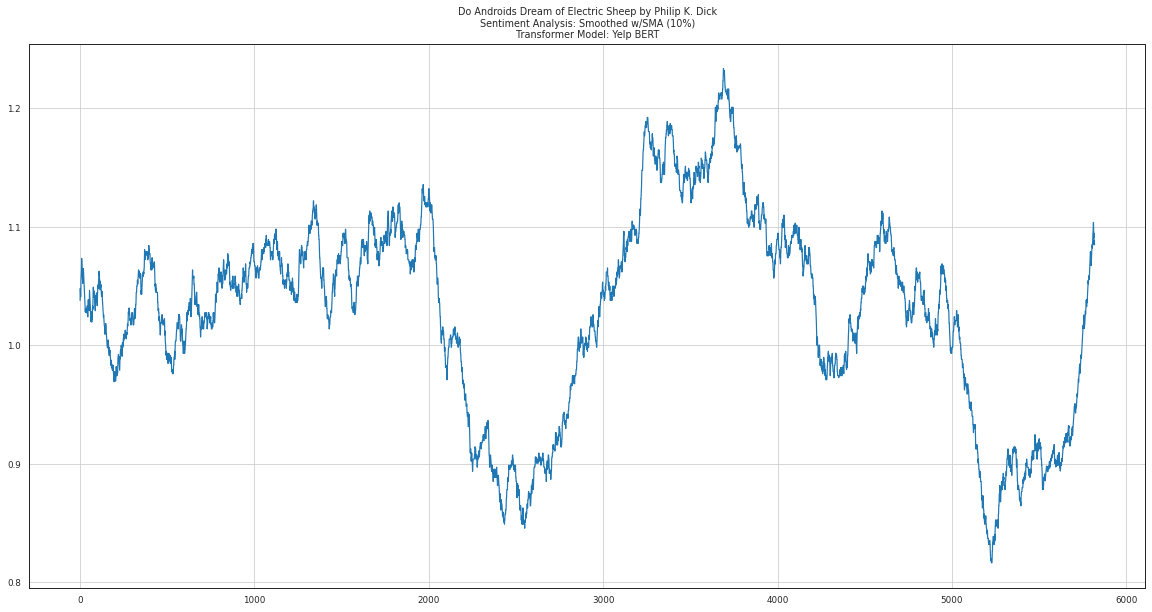

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0                                                                 DO ANDROIDS DREAM OF ELECTRIC SHEEP?   
1  A merry little surge of electricity piped by automatic alarm from the mood organ beside his bed ...   
2  Surprised - it always surprised him to find himself awake without prior notice - he rose from th...   
3  Now, in her bed, his wife Iran opened her gray, unmerry eyes, blinked, then groaned and shut her...   
4                                                      "You set your Penfield too weak he said to her.   

                                                                                            text_clean  \
0                                                                   do android dream of electric sheep   
1  a merry little surge of electricity pipe by automatic alarm from the mood organ beside his bed a...   
2  surprise it always surprise him to find himself awake without prior notice he rise from the bed ...   
3       now in her bed his wife iran open her gray unmerry eye blink then groan and shut her eye again   
4                                                         you set your penfield too weak he say to her   

   roberta15lg  huggingface   nlptown  yelp  
0    -0.988568     0.888154  4.320016     4  
1     0.998337     0.964321  4.597209     2  
2     0.998160     0.659327  4.639219     0  
3    -0.998644    -0.976472  0.430815     0  
4    -0.999457    -0.999153  0.457059     0

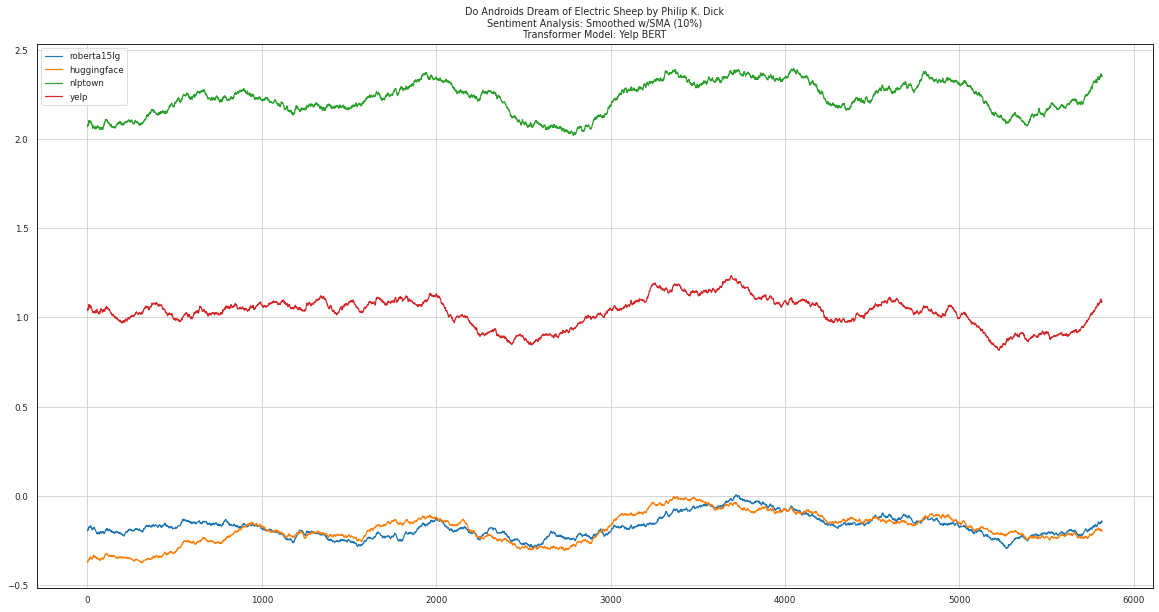

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'yelp'
# model_current = 'yelp'


os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'


# Filter out all models but Current One to Save
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')

Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['pkdick_doandroidsdreamofelectricsheep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus5/'

Saving yelp Model for all Texts
Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus5//sentiment_raw_novels_new_corpus5_transformer_yelp.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 6575
-rw------- 1 root root 1911427 Apr 20 03:07 sentiment_raw_novels_new_corpus5_all_4syuzhetr.json
-rw------- 1 root root 3418637 Apr 20 03:19 sentiment_raw_novels_new_corpus5_all_8sentimentr.json
-rw------- 1 root root  392712 Apr 20 04:04 sentiment_raw_novels_new_corpus5_transformer_roberta15lg.json
-rw------- 1 root root  392748 Apr 20 04:10 sentiment_raw_novels_new_corpus5_transformer_huggingface.json
-rw------- 1 root root  364785 Apr 20 04:18 sentiment_raw_novels_new_corpus5_transformer_nlptown.json
-rw------- 1 root root  250315 Apr 20 04:28 sentiment_raw_novels_new_corpus5_transformer_yelp.json


## **Hinglish Mixed Code BERT (3 cats)**

In [ ]:
# Hindi-English Code Switching BERT Model

tokenizer = AutoTokenizer.from_pretrained("rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment")

sa_model = None
del sa_model
sa_model = AutoModelForSequenceClassification.from_pretrained("rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment")

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)
print(f'Hinglish SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'\n\nSENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')

In [ ]:
# Define Model and Test

model_title = 'Hinglish Dual Code BERT'
model_name = 'hinglish'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
aemoji_str_enc = tokenizer(emoji_str, return_tensors='pt')
logits_tensor = sa_model(**aemoji_str_enc)
sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
print(f'Emoji String: {emoji_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  aword_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


In [ ]:
%%time

# NOTE:    10m45s @17:39 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#          10m19s @17:48 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)
#          49m55s @12:45 on 20220412 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#          49m55s @14:54 on 20220412 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#          30m45s @00:06 on 20220413 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#          11m37s on 20220419 Colab Pro T4 (1 Novel: 502k)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: logitstensor2sentiment(sa_model(**tokenizer(x, return_tensors='pt')))[0])
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'hinglish'
# model_current = 'hinglish'


os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **BERT IMDB Sentiment (2 cats)**


In [ ]:
# BERT Sentiment Classifier fine-tuned on IMDB

tokenizer = AutoTokenizer.from_pretrained("abhishek/autonlp-imdb_sentiment_classification-31154")

sa_model = None
del sa_model
sa_model = AutoModelForSequenceClassification.from_pretrained("abhishek/autonlp-imdb_sentiment_classification-31154")

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)
print(f'IMDB SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'\n\nSENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')

In [ ]:
# Define Model and Test

model_title = 'IMDB BERT'
model_name = 'imdb2way'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
aemoji_str_enc = tokenizer(emoji_str, return_tensors='pt')
logits_tensor = sa_model(**aemoji_str_enc)
sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
print(f'Emoji String: {emoji_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  aword_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')





In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

sent_test_str = "I hate Mondays and bad doctors."
print(f"Sentence: {sent_test_str}\n {logitstensor2sentiment(sa_model(**tokenizer(sent_test_str, return_tensors='pt')))[0]}")

In [ ]:
%%time

# NOTE:     4m32s @18:10 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#           4m08s @18:15 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)
#          00m00s @12:45 on 20220412 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#          00m00s @14:54 on 20220412 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#          17m03s @17:37 on 20220412 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#          15m07s @00:40 on 20220413 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#           5m41s @16:21 on 20220419 Colab Pro T4 (1 Novel: 502k)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: logitstensor2sentiment(sa_model(**tokenizer(x, return_tensors='pt')))[0])
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'imdb2way'
# model_current = 'imdb2way'


os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **T5Base 50k Finetuned IMDB Sentiment Extraction (2 cats)**

In [ ]:
# T5 Base Model Fine-tuned on 50k IMDB 

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-imdb-sentiment")

amodel = None
del amodel
amodel = AutoModelWithLMHead.from_pretrained("mrm8488/t5-small-finetuned-imdb-sentiment")

sa_model = None
del sa_model

def sa_model(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = amodel.generate(input_ids=input_ids,
               max_length=2)
  
  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  return label

sa_model("I dislike a lot that film")

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
res = sa_model(text_str)
# type(res)
print(f'res: [{res}]')


In [ ]:
def t5str2sentiment(t5_str):
  '''
  Given a T5 text string with sentiment and tags
  Return a -1,0,1 for negative,neutral/OOV,positive sentiment
  '''

  t5_sentiment1_str = t5_str.replace('<pad>','')
  t5_sentiment2_str = t5_sentiment1_str.replace('</s>','')
  t5_core_str = t5_sentiment2_str.strip().lower()
  # print(f't5_sentiment_raw_str: {t5_sentiment_raw_str}')
  # print(f't5_sentiment_str: {t5_sentiment_str}')
  # print(f't5_core_str: {t5_core_str}')
  if t5_core_str == 'positive':
    t5_sentiment_fl = 1
  elif t5_core_str == 'negative':
    t5_sentiment_fl = -1
  elif len(t5_core_str) > 0:
    # Out of Vocab (OOV) Word
    t5_sentiment_fl = 0
  elif len(t5_core_str) == 0:
    # Empty String
    t5_sentiment_fl = 0
  else:
    print(f'ERROR: Illegal value ts_sentiment_str: {t5_sentiment_str}')

  return int(t5_sentiment_fl)

# Test
asent_str = "I love the good and kind-hearted lovely lady who give me tasty cookies."
t5_response_str = sa_model(asent_str)
asentiment_int = t5str2sentiment(t5_response_str)
print(f'STRING: {asent_str}\nSENTIMENT: {asentiment_int}')

In [ ]:
# Define Model and Test

model_title = 'T5 Base IMDB50K'
model_name = 't5imdb50k'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  t5_sentiment_raw_str = t5str2sentiment(sa_model(aword_str))
  print(f'Word: {aword_str}\n    Sentiment: {t5_sentiment_raw_str}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  t5_sentiment_raw_str = t5str2sentiment(sa_model(asent_str))
  print(f'Word: {asent_str}\n    Sentiment: {t5_sentiment_raw_str}\n')

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}\n')

sent_test_str = "I hate Mondays and bad doctors."
# sent_test_str = "You are a disgusting pig - I hate you."
print(f"SENTENCE: {sent_test_str}\nSENTIMENT: {t5str2sentiment(sa_model(sent_test_str))}")

In [ ]:
%%time

# NOTE:    10m45s @17:39 on 20220301 Colab Pro (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#          10m00s @17:48 on 20220301 Colab Pro (1 Novel: scollins_thehungergames1: 9.0k sentences)
#          15m21s @18:06 on 20220412 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#          15m57s @00:57 on 20220413 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#           6m06s @16:28 on 20220419 Colab Pro T4 (1 Novel: 502k)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: t5str2sentiment(sa_model(x)))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 't5imdb50k'
# model_current = 't5imdb50k'


os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **RoBERTa XLM Twitter 8 Multilingual (3 cats)**

In [ ]:
# RoBERTa XLM Fine-tuend on 8 Multilingual Tweets

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

# Test
sa_model("T'estimo!")

In [ ]:
# from transformers.utils.dummy_pt_objects import SQUEEZEBERT_PRETRAINED_MODEL_ARCHIVE_LIST

# Define Model and Test

model_title = 'RoBERTa XLM Twitter 8Lang'
model_name = 'robertaxml8lang'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  # word_sentiment_fl = SQUEEZEBERT_PRETRAINED_MODEL_ARCHIVE_LIST(aword_str)
  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  # sent_sentiment_fl = labelscore2fl(sa_model(asent_str), sa_model='robertaxml8lang')
  sent_sentiment_fl = labelscore2fl(sa_model(asent_str), sa_model='robertaxml8lang')
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl:.3f}\n')

In [ ]:
%%time

# NOTE:     9m05s @16:40 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity)
#          ~8m07s @16:49 on 20220201 Colab Pro P100 (1 Novel: scollins_thehungergames1)
#          30m36s @18:33 on 20220412 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#          28m29s @01:16 on 20220413 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#          11m34s @16:35 on 20220419 Colab Pro T4 (1 Novel: 502k)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: labelscore2fl(sa_model(x), sa_model='robertaxml8lang'))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx] 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'robertaxml8lang'
# model_current = 'robertaxml8lang'


os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **FinBERT Tone (3 cats)**

In [ ]:
# FinBERT Tone

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sa_model = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

In [ ]:
# Test

fin_sentences_ls = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results_ls = sa_model(fin_sentences_ls)
print(results_ls)

In [ ]:
# Test

fin_sentences_ls = ["I love sunny days and happy puppy dogs.",
                    "The market crashed and all indicators were down",
                    "Strong institutional buying resulted in rising share prices and a bull market"]
                  
results_ls = sa_model(fin_sentences_ls)

def dtlabelscore2fl(adict):
  """
  Given a dictionary of 2 keys ['label']=[positive|negative|neutral] and ['score']=[0.0 to +1.0]
  Return an adjusted sentiment score [-1.0 to +1.0]
  """
  adj_sentiment = 0.
  apolarity = adict['label']
  asentiment = adict['score']
  if apolarity == 'negative':
    adj_sentiment = -1. * float(asentiment)
  elif apolarity == 'positive':
    adj_sentiment = float(asentiment)
  else:
    adj_sentiment = 0.

  return adj_sentiment

for i, asent_dt in enumerate(results_ls):
  asentence = fin_sentences_ls[i]
  raw_results = results_ls[i]
  adj_senti = dtlabelscore2fl(asent_dt)
  # print(f'SENTENCE:\n    {asentence}\n    apolarity: {apolarity}\n    asentiment: {asentiment}\n    adj_sentiment: {adj_sentiment}') 
  print(f'SENTENCE:\n    {asentence}\n    raw_results: {raw_results}\n    adj_sentiment: {adj_senti}')


In [ ]:
# Define Model and Test

model_title = 'FinBERT Tone'
model_name = 'finberttone'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
raw_sentiment = sa_model(emoji_str)[0]
adj_sentiment = dtlabelscore2fl(raw_sentiment)
print(f'Emoji String: {emoji_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  raw_sentiment = sa_model(aword_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Word String: {aword_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print('\n\n')
  # print(f'Word: {aword_str}\n    Raw Sentiment: {adj_sentiment} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  raw_sentiment = sa_model(asent_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Sentence String: {asent_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print(f'Sentence: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


In [ ]:
%%time

# NOTE:    16m22s @21:56 on 20220301 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#          28m01s @01:48 on 20220413 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#          11m25s @16:57 on 20220419 Colab Pro T4 (1 Novel: 502k)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: dtlabelscore2fl(sa_model(x)[0]))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'finberttone'
# model_current = 'finberttone'


os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **DistilRoBERTa Financial News (3 cats)**

In [ ]:
# distilbertfinnews

distilrobertfinnews = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis", model=distilrobertfinnews, tokenizer=tokenizer)

In [ ]:
# Test

fin_sentences_ls = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results_ls = sa_model(fin_sentences_ls)
print(results_ls)

In [ ]:
# Test

fin_sentences_ls = ["I love sunny days and happy puppy dogs.",
                    "The market crashed and all indicators were down",
                    "Strong institutional buying resulted in rising share prices and a bull market"]
                  
results_ls = sa_model(fin_sentences_ls)

def dtlabelscore2fl(adict):
  """
  Given a dictionary of 2 keys ['label']=[positive|negative|neutral] and ['score']=[0.0 to +1.0]
  Return an adjusted sentiment score [-1.0 to +1.0]
  """
  adj_sentiment = 0.
  apolarity = adict['label']
  asentiment = adict['score']
  if apolarity == 'negative':
    adj_sentiment = -1. * float(asentiment)
  elif apolarity == 'positive':
    adj_sentiment = float(asentiment)
  else:
    adj_sentiment = 0.

  return adj_sentiment

for i, asent_dt in enumerate(results_ls):
  asentence = fin_sentences_ls[i]
  raw_results = results_ls[i]
  adj_senti = dtlabelscore2fl(asent_dt)
  # print(f'SENTENCE:\n    {asentence}\n    apolarity: {apolarity}\n    asentiment: {asentiment}\n    adj_sentiment: {adj_sentiment}') 
  print(f'SENTENCE:\n    {asentence}\n    raw_results: {raw_results}\n    adj_sentiment: {adj_senti}')


In [ ]:
# Define Model and Test

model_title = 'DistilBERT FinNews'
model_name = 'distilbertfinnews'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
raw_sentiment = sa_model(emoji_str)[0]
adj_sentiment = dtlabelscore2fl(raw_sentiment)
print(f'Emoji String: {emoji_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  raw_sentiment = sa_model(aword_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Word String: {aword_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print('\n\n')
  # print(f'Word: {aword_str}\n    Raw Sentiment: {adj_sentiment} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  raw_sentiment = sa_model(asent_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Sentence String: {asent_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print(f'Sentence: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


In [ ]:
%%time

# NOTE:    9m16s @21:56 on 20220301 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#         28m01s @02:17 on 20220413 Colab Pro P100 (3 FinTexts, 1.2M, 1.3M, 1.7M)
#          6m07s @16:59 on 20220419 Colab Pro T4 (1 Novel: 502k)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: dtlabelscore2fl(sa_model(x)[0]))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'distilbertfinnews'
# model_current = 'distilbertfinnews'


os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **FinBERT (3 cats)**



In [ ]:
# ProsusAI FinBERT

finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

In [ ]:
# Test

fin_sentences_ls = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results_ls = sa_model(fin_sentences_ls)
print(results_ls)

In [ ]:
# Test

fin_sentences_ls = ["I love sunny days and happy puppy dogs.",
                    "The market crashed and all indicators were down",
                    "Strong institutional buying resulted in rising share prices and a bull market"]
                  
results_ls = sa_model(fin_sentences_ls)

def dtlabelscore2fl(adict):
  """
  Given a dictionary of 2 keys ['label']=[positive|negative|neutral] and ['score']=[0.0 to +1.0]
  Return an adjusted sentiment score [-1.0 to +1.0]
  """
  adj_sentiment = 0.
  apolarity = adict['label']
  asentiment = adict['score']
  if apolarity == 'negative':
    adj_sentiment = -1. * float(asentiment)
  elif apolarity == 'positive':
    adj_sentiment = float(asentiment)
  else:
    adj_sentiment = 0.

  return adj_sentiment

for i, asent_dt in enumerate(results_ls):
  asentence = fin_sentences_ls[i]
  raw_results = results_ls[i]
  adj_senti = dtlabelscore2fl(asent_dt)
  # print(f'SENTENCE:\n    {asentence}\n    apolarity: {apolarity}\n    asentiment: {asentiment}\n    adj_sentiment: {adj_sentiment}') 
  print(f'SENTENCE:\n    {asentence}\n    raw_results: {raw_results}\n    adj_sentiment: {adj_senti}')


In [ ]:
# Define Model and Test

model_title = 'FinBERT'
model_name = 'finbert'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
raw_sentiment = sa_model(emoji_str)[0]
adj_sentiment = dtlabelscore2fl(raw_sentiment)
print(f'Emoji String: {emoji_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  raw_sentiment = sa_model(aword_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Word String: {aword_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print('\n\n')
  # print(f'Word: {aword_str}\n    Raw Sentiment: {adj_sentiment} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  raw_sentiment = sa_model(asent_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Sentence String: {asent_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print(f'Sentence: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


In [ ]:
%%time

# NOTE:    16m13s @22:39 on 20220301 Colab Pro T4 (2 FinTexts: 1M, 1.1M)
#          11m35s @17:07 on 20220419 Colab Pro T4 (1 Novel: 502k)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: dtlabelscore2fl(sa_model(x)[0]))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

# defined above
# model_name = 'finbert'
# model_current = 'finbert'


os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_{model_name}.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_transformer_{model_name}.json'

# Filter out all models but Current One 
current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Saving {model_name} Model for all Texts')
  current_model_dt[atext] = pd.DataFrame(global_vars.corpus_texts_dt[atext][model_name])

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

# **END OF NOTEBOOK**